In [29]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import random
pio.templates.default = 'simple_white'
import datetime
import tqdm

In [30]:
pio.renderers.default = "jpeg"

### Modelling retention

In [31]:
def get_retention(a, b, c, d, periods):
    return  a + 1./(b + c*periods ** d)

def get_retention_same_event(a, c, d, periods):
    b = 1./(1 - a)
    return get_retention(a, b, c, d, periods)

In [32]:
sample_df = pd.DataFrame()
sample_df['periods'] = range(30)

/var/folders/7v/1ln722x97kd8bchgxpmdkynw0000gn/T/ipykernel_6996/3223025482.py:18: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



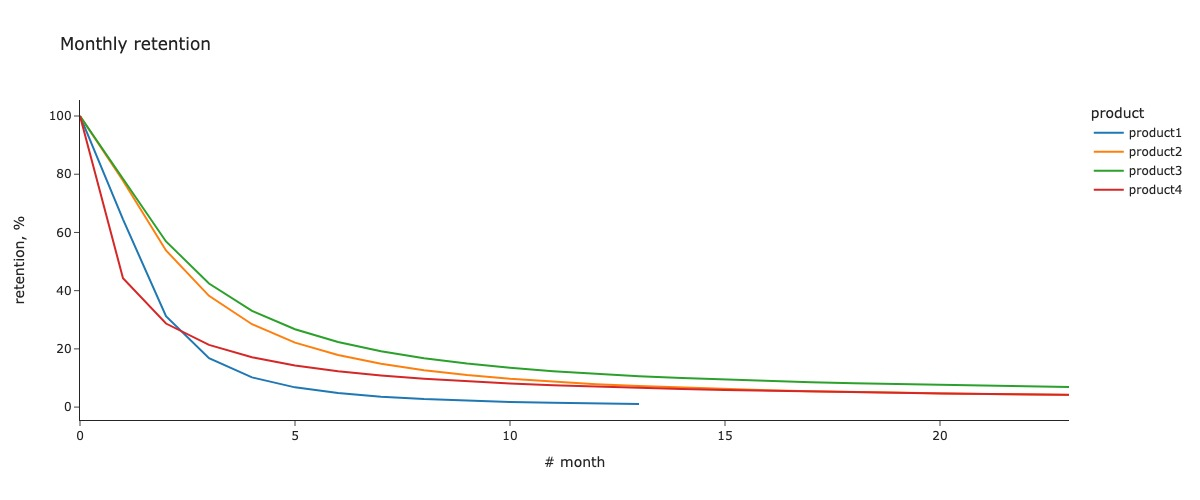

In [33]:
sample_df = pd.DataFrame()
sample_df['periods'] = range(24)

product_coefs = [
    (0, 0.55, 2),
    (0.02, 0.3, 1.6),
    (0.04, 0.3, 1.5),
    (0.01, 1.3, 1)
]

for i in range(len(product_coefs)):
    sample_df['product' + str(i + 1)] = sample_df.periods.map(
        lambda x: get_retention_same_event(product_coefs[i][0], product_coefs[i][1],
                                           product_coefs[i][2], x)
    )
    
sample_df = sample_df.set_index('periods')
px.line(sample_df.applymap(lambda x: None if x < 0.01 else 100*x).loc[0:],
        width = 1200,
       title = 'Monthly retention',
       labels = {'value': 'retention, %',
                'periods': '# month',
                'variable': 'product'})